In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('oscars_finalized.csv')

In [5]:
df.drop(['is_Nominated', 'Year'], axis = 1, inplace = True)

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No win', round(df['Won'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Win', round(df['Won'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No win 98.75 % of the dataset
Win 1.25 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Win || 1: Win)')

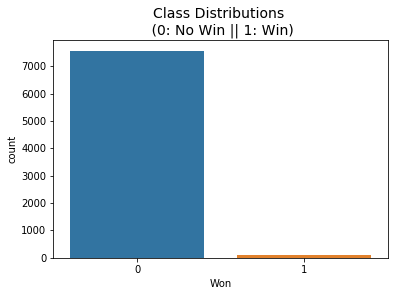

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot('Won', data=df)
plt.title('Class Distributions \n (0: No Win || 1: Win)', fontsize=14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Columns: 145 entries, ID to Won
dtypes: float64(2), int64(143)
memory usage: 8.5 MB


In [9]:
df['Won'].value_counts()

0    7570
1      96
Name: Won, dtype: int64

In [10]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of won movies = 96 rows.
won_df = df.loc[df['Won'] == 1]
not_won_df = df.loc[df['Won'] == 0][:96]

normal_distributed_df = pd.concat([won_df, not_won_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ID,Budget,Runtime,Months_till_Dec,Metascore,imdbRating,Animation,Comedy,Family,Adventure,...,Venezuela,Laos,Uganda,Kosovo,Qatar,Colombia,Pakistan,Cambodia,Nigeria,Won
6684,5909,19125939,152,4,91.00,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6318,4882,27151434,84,3,38.00,5.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7649,3605,25227272,123,10,83.53,5.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2735,1595,37000000,108,9,54.32,6.4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2304,4280,14835965,121,8,81.00,7.8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Distribution of the Won in the subsample dataset
1    0.5
0    0.5
Name: Won, dtype: float64


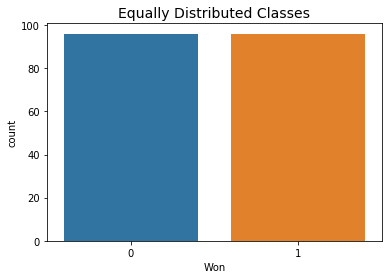

In [11]:
print('Distribution of the Won in the subsample dataset')
print(new_df['Won'].value_counts()/len(new_df))

sns.countplot('Won', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [12]:
new_df.columns

Index(['ID', 'Budget', 'Runtime', 'Months_till_Dec', 'Metascore', 'imdbRating',
       'Animation', 'Comedy', 'Family', 'Adventure',
       ...
       'Venezuela', 'Laos', 'Uganda', 'Kosovo', 'Qatar', 'Colombia',
       'Pakistan', 'Cambodia', 'Nigeria', 'Won'],
      dtype='object', length=145)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df[['Budget', 'Runtime', 'Months_till_Dec', 'Metascore', 'imdbRating']] = scaler.fit_transform(new_df[['Budget', 'Runtime', 'Months_till_Dec', 'Metascore', 'imdbRating']])
new_df

,ID,Budget,Runtime,Months_till_Dec,Metascore,imdbRating,Animation,Comedy,Family,Adventure,...,Venezuela,Laos,Uganda,Kosovo,Qatar,Colombia,Pakistan,Cambodia,Nigeria,Won
6684,5909,0.059867,0.505495,0.363636,0.900000,0.800000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6318,4882,0.084989,0.131868,0.272727,0.311111,0.433333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7649,3605,0.078966,0.346154,0.909091,0.817000,0.450000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2735,1595,0.115817,0.263736,0.818182,0.492444,0.533333,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2304,4280,0.046439,0.335165,0.727273,0.788889,0.766667,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,4041,0.223921,0.439560,0.818182,0.577778,0.666667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7558,3997,0.017751,0.219780,0.545455,0.817000,0.416667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,645,0.039113,0.307692,0.181818,0.817000,0.666667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4021,2677,0.232198,0.368132,1.000000,0.055556,0.100000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
X = new_df.drop(['Won', 'ID'], axis = 1)
y = new_df['Won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

          Specs     Score
10        Drama  9.100111
15      History  7.863154
19       Horror  7.700778
3     Metascore  7.273470
12       Action  6.317526
27      Musical  5.875299
20          War  5.376839
14     Thriller  5.249749
11      Romance  3.867299
1       Runtime  3.768778
4    imdbRating  3.757334
23  Documentary  3.746835
16      Science  3.255584
17      Fiction  3.255584
31       France  2.828190


In [24]:
featureScores.nlargest(15,'Score')['Specs'].to_list()

['Drama',
 'History',
 'Horror',
 'Metascore',
 'Action',
 'Musical',
 'War',
 'Thriller',
 'Romance',
 'Runtime',
 'imdbRating',
 'Documentary',
 'Science',
 'Fiction',
 'France']

In [25]:
impt = new_df[featureScores.nlargest(15,'Score')['Specs'].to_list()]

In [26]:
impt.head()

,Drama,History,Horror,Metascore,Action,Musical,War,Thriller,Romance,Runtime,imdbRating,Documentary,Science,Fiction,France
6684,1,0,0,0.900000,0,0,1,0,0,0.505495,0.800000,0,0,0,0
6318,1,0,0,0.311111,1,0,0,1,0,0.131868,0.433333,0,0,0,0
7649,1,0,0,0.817000,0,0,0,0,0,0.346154,0.450000,0,0,0,0
2735,1,0,0,0.492444,0,0,0,0,0,0.263736,0.533333,0,0,0,0
2304,0,0,0,0.788889,1,0,0,0,0,0.335165,0.766667,0,0,0,1


In [27]:
impt['Won'] = new_df['Won']

C:\Users\Basudev\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
impt

,Drama,History,Horror,Metascore,Action,Musical,War,Thriller,Romance,Runtime,imdbRating,Documentary,Science,Fiction,France,Won
6684,1,0,0,0.900000,0,0,1,0,0,0.505495,0.800000,0,0,0,0,1
6318,1,0,0,0.311111,1,0,0,1,0,0.131868,0.433333,0,0,0,0,0
7649,1,0,0,0.817000,0,0,0,0,0,0.346154,0.450000,0,0,0,0,1
2735,1,0,0,0.492444,0,0,0,0,0,0.263736,0.533333,0,0,0,0,0
2304,0,0,0,0.788889,1,0,0,0,0,0.335165,0.766667,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1,0,0,0.577778,0,1,0,0,0,0.439560,0.666667,0,0,0,1,0
7558,1,0,0,0.817000,0,1,0,0,1,0.219780,0.416667,0,0,0,0,1
746,1,0,0,0.817000,0,0,0,0,0,0.307692,0.666667,0,0,0,0,1
4021,1,0,0,0.055556,1,0,0,0,0,0.368132,0.100000,0,0,0,0,0


In [29]:
featureScores.to_csv('FeatureScores.csv', index = False)
impt.to_csv('DownSampled_Oscars.csv', index = False)